In [ ]:
import torch
import torch.nn as nn
import torch.functional as fn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from torch.autograd import Variable
from tqdm import tqdm_notebook
from IPython.display import clear_output

##Code check

In [ ]:
class Hashing_network(nn.Module):
  def __init__(self):
    super(Hashing_network,self).__init__()
    self.network=nn.Sequential(
        nn.Linear(1,10),
        nn.LeakyReLU(),
        nn.Linear(10,20),
        nn.LeakyReLU(),
        nn.Linear(20,20),
        nn.LeakyReLU(),
        nn.Linear(20,5),
        nn.LeakyReLU(),
        nn.Linear(5,1)
    )
  
  def forward(self,x):
    return self.network(x)

In [ ]:
def train(model,x,y,optim,lsfun,device):
  b_x=Variable(x)
  b_y=Variable(y)
  model.train()
  optim.zero_grad()
  out=model.forward(b_x)
  loss=lsfun(out,b_y)
  loss.backward()
  optim.step()
  return out.detach(),loss.detach()

In [ ]:
def train_setup(model,list_,lsfunc,lr,momentum,epochs,device):
  opt=optim.Adam(model.parameters(),lr=lr)
  ls=[]
  actual_y=[i for i in range(len(list_))]
  for i in range(epochs):
    #print(torch.tensor(list_).reshape(-1,1))
    out,loss=train(model,torch.tensor(list_,dtype=torch.float).reshape(-1,1),torch.tensor(actual_y,dtype=torch.float).reshape(-1,1),opt,lsfunc,device)
    ls.append(loss)
    #print(out)
    #plt.scatter(list_,out.detach().numpy(),color='r')
    #plt.scatter(list_,actual_y,color='b')
  plt.plot(ls)
  plt.show()

In [ ]:
lsfun=nn.MSELoss()
list_=[random.randint(1,100) for i in range(20)]
model=Hashing_network()

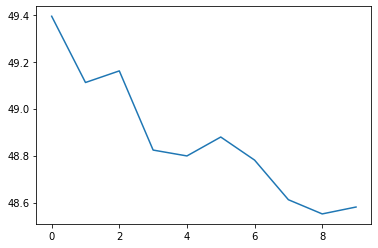

In [ ]:
train_setup(model,list_,lsfun,0.1,0.9,10,'cpu')

In [ ]:
a=torch.tensor([1,2,3,4,5])
print(torch.tensor(a,dtype=torch.float))

tensor([1., 2., 3., 4., 5.])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


##Hashing for numerical values

In [ ]:
#Choosing device
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#Creating FF networks
net_num=nn.Sequential(
    nn.Linear(1,100),
    nn.LeakyReLU(),
    nn.Linear(100,200),
    nn.LeakyReLU(),
    nn.Linear(200,300),
    nn.LeakyReLU(),
    nn.Linear(300,400),
    nn.LeakyReLU(),
    nn.Linear(400,1)
)

In [ ]:
 #data defining
no_data_pts=100
x=random.sample(range(100),no_data_pts)
print(x)
y=[i for i in range(no_data_pts)]

[72, 31, 23, 38, 39, 83, 32, 10, 86, 66, 13, 56, 42, 48, 40, 15, 7, 54, 85, 95, 46, 28, 44, 76, 49, 59, 22, 62, 70, 92, 96, 30, 63, 34, 20, 24, 97, 79, 88, 99, 67, 5, 82, 91, 8, 4, 11, 73, 77, 27, 29, 17, 53, 18, 74, 94, 58, 65, 93, 26, 98, 55, 68, 12, 45, 14, 52, 80, 81, 89, 1, 0, 61, 84, 6, 33, 69, 51, 64, 9, 36, 60, 16, 25, 2, 43, 47, 41, 35, 87, 19, 71, 78, 75, 90, 50, 21, 3, 37, 57]


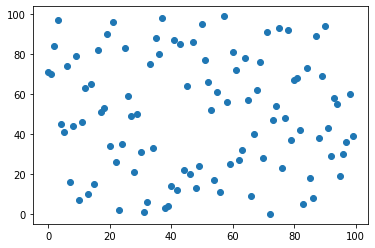

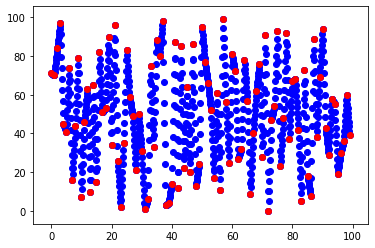

In [ ]:
#Redefining datapts
import numpy as np
import copy
sorted_x=copy.deepcopy(x)
sorted_y=copy.deepcopy(y)
sorted_y=[x for _,x in sorted(zip(sorted_x,sorted_y))]
sorted_x.sort()
agumented_x=[]
agumented_y=[]
sampling_interval=10
#agumented_x.append()
#agumented_y.append()
plt.scatter(sorted_x,sorted_y)
plt.show()
for i in range(len(sorted_x)-1):
  x1,y1=sorted_x[i],sorted_y[i]
  x2,y2=sorted_x[i+1],sorted_y[i+1]
  m=(y2-y1)/(x2-x1)
  b=y2-m*x2
  new_Xs=np.linspace(x1,x2,10)
  agumented_x.extend(new_Xs)
  line = lambda x: m*x+b
  new_Ys=[line(i) for i in new_Xs]
  agumented_y.extend(new_Ys)
#print(agumented_x)
plt.scatter(agumented_x,agumented_y,color='b')
plt.scatter(sorted_x,sorted_y,color='r')
plt.show()

In [ ]:
#List->Tensor
tensor_x=torch.tensor(x,dtype=torch.float).reshape(-1,1)
tensor_y=torch.tensor(y,dtype=torch.float).reshape(-1,1)
tensor_x=Variable(tensor_x)
tensor_y=Variable(tensor_y)

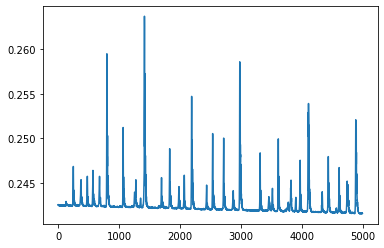

Final loss :  0.24163228273391724
Best loss :  tensor(0.2416, device='cuda:0', grad_fn=<MseLossBackward>)


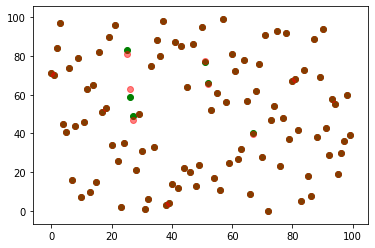

In [ ]:
ls=[]
epochs=100000
try:
  previous_try=ls[-1]
except:
  pass
net=copy.deepcopy(capture_model)
opt=optim.Adam(net.parameters(),lr=0.000001)
criterion=nn.MSELoss()
net.to(device)
device_tensor_x=tensor_x.to(device)
device_tensor_y=tensor_y.to(device)
print("device : ",device)
loss_interval=5000
#threshold_loss=1000
#capture_model=None
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
  #Loading resource to cuda memory
  net.train()
  opt.zero_grad()
  pred=net(device_tensor_x)
  net.train()
  opt.zero_grad()
  pred=net(device_tensor_x)
  loss=criterion(pred,device_tensor_y)
  loss.backward()
  ls.append(loss)
  opt.step()
  if loss.item()<=threshold_loss :
    threshold_loss=ls[-1]
    capture_model=copy.deepcopy(net)
  """
  if threshold_loss<1:
    print("got less loss")
    break
  """
  if i%loss_interval==0:
    clear_output(True)
    print("Current loss : ",ls[-1])
    print("Best recorded : ",threshold_loss)
    plt.plot(ls)
    plt.show()
    plt.scatter(x,y,color='g')
    plt.scatter(x,pred.to('cpu').detach().numpy(),color='r',alpha=0.5)
    plt.show()
    ls=[]

clear_output(True)
plt.plot(ls)
plt.show()
if torch.cuda.is_available():
  torch.cuda.empty_cache()

capture_model.eval()
capture_model.to('cpu')
print("Final loss : ",loss.item())
print("Best loss : ",threshold_loss)
plt.scatter(tensor_x.detach().numpy(),tensor_y.detach().numpy(),color='g')
plt.scatter(tensor_x.detach().numpy(),capture_model(tensor_x).detach().numpy(),color='r',alpha=0.5)
plt.show()
torch.save(capture_model,"hashing_model.pt")
#files.download("hashing_model.pt")

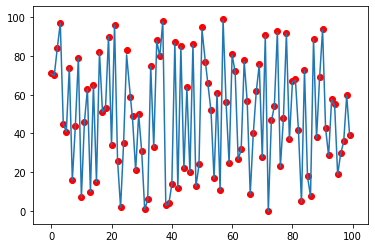

In [ ]:
net.eval()
net.to('cpu')
validate_x=[i for i in range(min(x),max(x)+1)]
tensor_vaildate_x=torch.tensor(validate_x,dtype=torch.float).reshape(-1,1)
plt.plot(tensor_vaildate_x,net(tensor_vaildate_x).detach().numpy())
#plt.scatter(tensor_x.detach().numpy(),tensor_y.detach().numpy(),color='g')
plt.scatter(x,y,color='r')
plt.show()

##data for word hashing

In [ ]:
#Data prep
data="""
abandon
ability
able
abortion
about
above
abroad
absence
absolute
absolutely
absorb
abuse
academic
accept
access
accident
accompany
accomplish
according
account
accurate
accuse
achieve
achievement
acid
acknowledge
acquire
across
act
action
active
activist
activity
actor
actress
actual
actually
ad
adapt
add
addition
additional
address
adequate
adjust
adjustment
administration
administrator
admire
admission
admit
adolescent
adopt
adult
advance
advanced
advantage
adventure
advertising
advice
advise
adviser
advocate
affair
affect
afford
afraid
African
African-American
after
afternoon
again
against
age
agency
agenda
agent
aggressive
ago
agree
agreement
agricultural
ah
ahead
aid
aide
AIDS
aim
air
aircraft
airline
airport
album
alcohol
alive
all
alliance
allow
ally
almost
alone
along
already
also
alter
alternative
although
always
AM
amazing
American
among
amount
analysis
analyst
analyze
ancient
and
anger
angle
angry
animal
anniversary
announce
annual
another
answer
anticipate
anxiety
any
anybody
anymore
anyone
anything
anyway
anywhere
apart
apartment
apparent
apparently
appeal
appear
appearance
apple
application
apply
appoint
appointment
appreciate
approach
appropriate
approval
approve
approximately
Arab
architect
area
argue
argument
arise
arm
armed
army
around
arrange
arrangement
arrest
arrival
arrive
art
article
artist
artistic
as
Asian
aside
ask
asleep
aspect
assault
assert
assess
assessment
asset
assign
assignment
assist
assistance
assistant
associate
association
assume
assumption
assure
at
athlete
athletic
atmosphere
attach
attack
attempt
attend
attention
attitude
attorney
attract
attractive
attribute
audience
author
authority
auto
available
average
avoid
award
aware
awareness
away
awful
baby
back
background
bad
badly
bag
bake
balance
ball
ban
band
bank
bar
barely
barrel
barrier
base
baseball
basic
basically
basis
basket
basketball
bathroom
battery
battle
be
beach
bean
bear
beat
beautiful
beauty
because
become
bed
bedroom
beer
before
begin
beginning
behavior
behind
being
belief
believe
bell
belong
below
belt
bench
bend
beneath
benefit
beside
besides
best
bet
better
between
beyond
Bible
big
bike
bill
billion
bind
biological
bird
birth
birthday
bit
bite
black
blade
blame
blanket
blind
block
blood
blow
blue
board
boat
body
bomb
bombing
bond
bone
book
boom
boot
border
born
borrow
boss
both
bother
bottle
bottom
boundary
bowl
box
boy
boyfriend
brain
branch
brand
bread
break
breakfast
breast
breath
breathe
brick
bridge
brief
briefly
bright
brilliant
bring
British
broad
broken
brother
brown
brush
buck
budget
build
building
bullet
bunch
burden
burn
bury
bus
business
busy
but
butter
button
buy
buyer
by
cabin
cabinet
cable
cake
calculate
call
camera
camp
campaign
campus
can
Canadian
cancer
candidate
cap
capability
capable
capacity
capital
captain
capture
car
carbon
card
care
career
careful
carefully
carrier
carry
case
cash
cast
cat
catch
category
Catholic
cause
ceiling
celebrate
celebration
celebrity
cell
center
central
century
CEO
ceremony
certain
certainly
chain
chair
chairman
challenge
chamber
champion
championship
chance
change
changing
channel
chapter
character
characteristic
characterize
charge
charity
chart
chase
cheap
check
cheek
cheese
chef
chemical
chest
chicken
chief
child
childhood
Chinese
chip
chocolate
choice
cholesterol
choose
Christian
Christmas
church
cigarette
circle
circumstance
cite
citizen
city
civil
civilian
claim
class
classic
classroom
clean
clear
clearly
client
climate
climb
clinic
clinical
clock
close
closely
closer
clothes
clothing
cloud
club
clue
cluster
coach
coal
coalition
coast
coat
code
coffee
cognitive
cold
collapse
colleague
collect
collection
collective
college
colonial
color
column
combination
combine
come
comedy
comfort
comfortable
command
commander
comment
commercial
commission
commit
commitment
committee
common
communicate
communication
community
company
compare
comparison
compete
competition
competitive
competitor
complain
complaint
complete
completely
complex
complicated
component
compose
composition
comprehensive
computer
concentrate
concentration
concept
concern
concerned
concert
conclude
conclusion
concrete
condition
conduct
conference
confidence
confident
confirm
conflict
confront
confusion
Congress
congressional
connect
connection
consciousness
consensus
consequence
conservative
consider
considerable
consideration
consist
consistent
constant
constantly
constitute
constitutional
construct
construction
consultant
consume
consumer
consumption
contact
contain
container
contemporary
content
contest
context
continue
continued
contract
contrast
contribute
contribution
control
controversial
controversy
convention
conventional
conversation
convert
conviction
convince
cook
cookie
cooking
cool
cooperation
cop
cope
copy
core
corn
corner
corporate
corporation
correct
correspondent
cost
cotton
couch
could
council
counselor
count
counter
country
county
couple
courage
course
court
cousin
cover
coverage
cow
crack
craft
crash
crazy
cream
create
creation
creative
creature
credit
crew
crime
criminal
crisis
criteria
critic
critical
criticism
criticize
crop
cross
crowd
crucial
cry
cultural
culture
cup
curious
current
currently
curriculum
custom
customer
cut
cycle
dad
daily
damage
dance
danger
dangerous
dare
dark
darkness
data
date
daughter
day
dead
deal
dealer
dear
death
debate
debt
decade
decide
decision
deck
declare
decline
decrease
deep
deeply
deer
defeat
defend
defendant
defense
defensive
deficit
define
definitely
definition
degree
delay
deliver
delivery
demand
democracy
Democrat
democratic
demonstrate
demonstration
deny
department
depend
dependent
depending
depict
depression
depth
deputy
derive
describe
description
desert
deserve
design
designer
desire
desk
desperate
despite
destroy
destruction
detail
detailed
detect
determine
develop
developing
development
device
devote
dialogue
die
diet
differ
difference
different
differently
difficult
difficulty
dig
digital
dimension
dining
dinner
direct
direction
directly
director
dirt
dirty
disability
disagree
disappear
disaster
discipline
discourse
discover
discovery
discrimination
discuss
discussion
disease
dish
dismiss
disorder
display
dispute
distance
distant
distinct
distinction
distinguish
distribute
distribution
district
diverse
diversity
divide
division
divorce
DNA
do
doctor
document
dog
domestic
dominant
dominate
door
double
doubt
down
downtown
dozen
draft
drag
drama
dramatic
dramatically
draw
drawing
dream
dress
drink
drive
driver
drop
drug
dry
due
during
dust
duty
each
eager
ear
early
earn
earnings
earth
ease
easily
east
eastern
easy
eat
economic
economics
economist
economy
edge
edition
editor
educate
education
educational
educator
effect
effective
effectively
efficiency
efficient
effort
egg
eight
either
elderly
elect
election
electric
electricity
electronic
element
elementary
eliminate
elite
else
elsewhere
e-mail
embrace
emerge
emergency
emission
emotion
emotional
emphasis
emphasize
employ
employee
employer
employment
empty
enable
encounter
encourage
end
enemy
energy
enforcement
engage
engine
engineer
engineering
English
enhance
enjoy
enormous
enough
ensure
enter
enterprise
entertainment
entire
entirely
entrance
entry
environment
environmental
episode
equal
equally
equipment
era
error
escape
especially
essay
essential
essentially
establish
establishment
estate
estimate
etc
ethics
ethnic
European
evaluate
evaluation
even
evening
event
eventually
ever
every
everybody
everyday
everyone
everything
everywhere
evidence
evolution
evolve
exact
exactly
examination
examine
example
exceed
excellent
except
exception
exchange
exciting
executive
exercise
exhibit
exhibition
exist
existence
existing
expand
expansion
expect
expectation
expense
expensive
experience
experiment
expert
explain
explanation
explode
explore
explosion
expose
exposure
express
expression
extend
extension
extensive
extent
external
extra
extraordinary
extreme
extremely
eye
fabric
face
facility
fact
factor
factory
faculty
fade
fail
failure
fair
fairly
faith
fall
false
familiar
family
famous
fan
fantasy
far
farm
farmer
fashion
fast
fat
fate
father
fault
favor
favorite
fear
feature
federal
fee
feed
feel
feeling
fellow
female
fence
few
fewer
fiber
fiction
field
fifteen
fifth
fifty
fight
fighter
fighting
figure
file
fill
film
final
finally
finance
financial
find
finding
fine
finger
finish
fire
firm
first
fish
fishing
fit
fitness
five
fix
flag
flame
flat
"""

##Hashing for words

In [ ]:
#Data Generatiotn
#Required tensor size (max_word_length,batch_size,input_vector_size) (6,10,27) 27 for pad char
import re
words=data.split("\n")[1:-1]
x=list(map(lambda x:re.findall(r'[a-z]*',x)[0],words))[:10]
#x=[chr(97+i) for i in range(26)]
print(x)
y=[i for i in range(len(x))]
max_seq_len=max(list(map(len,x)))
#ASCII a : 97
vectors=[]
for i in x:
  vectors.append([])
  for j in i:
    vectors[-1].append(ord(j)-ord("a"))
print(len(vectors))

['abandon', 'ability', 'able', 'abortion', 'about', 'above', 'abroad', 'absence', 'absolute', 'absolutely']
10


In [ ]:
tensor_x=torch.zeros([max_seq_len,len(x),27])
for i in range(len(vectors)):
  for j in range(len(vectors[i])):
    tensor_x[j,i,vectors[i][j]]=1
  tensor_x[j+1:,i,-1]=1
#print(tensor_x[5,0,:])
tensor_y=torch.tensor(y,dtype=torch.float)

In [ ]:
class network(nn.Module):
  def __init__(self):
    super().__init__()
    self.mem=nn.GRU(27,10)#nonlinearity='relu'
    self.fnn=nn.Sequential(
        #nn.LeakyReLU(),
        nn.Linear(10,100),
        nn.LeakyReLU(),
        nn.Linear(100,200),
        nn.LeakyReLU(),
        nn.Linear(200,300),
        nn.LeakyReLU(),
        nn.Linear(300,400),
        nn.LeakyReLU(),
        nn.Linear(400,600),
        nn.LeakyReLU(),
        nn.Linear(600,800),
        nn.LeakyReLU(),
        nn.Linear(800,1)
    )
  def forward(self,x):
    a,b=self.mem(x)
    #print(a.shape,b.shape)
    return self.fnn(b.squeeze(0)),b.squeeze(0).detach()

In [ ]:
#Declaring net,optim and loss function
net=network()
net.eval()
_,pr=net(tensor_x)
print(pr)

tensor([[ 0.3320,  0.1497,  0.4740, -0.2427,  0.0444, -0.0916,  0.2288, -0.3381,
          0.1768, -0.4004],
        [ 0.3230,  0.1099,  0.4551, -0.2610,  0.0353, -0.0849,  0.2194, -0.3426,
          0.1718, -0.4299],
        [ 0.3777,  0.1198,  0.4594, -0.2514,  0.0612, -0.1226,  0.2325, -0.3480,
          0.1431, -0.4340],
        [ 0.2821,  0.1502,  0.4682, -0.2127,  0.0236, -0.0403,  0.2235, -0.3439,
          0.1859, -0.3837],
        [ 0.3725,  0.1267,  0.4634, -0.2338,  0.0656, -0.1105,  0.2247, -0.3571,
          0.1639, -0.4448],
        [ 0.3705,  0.1174,  0.4564, -0.2566,  0.0616, -0.1178,  0.2349, -0.3422,
          0.1418, -0.4284],
        [ 0.3643,  0.1302,  0.4609, -0.2316,  0.0502, -0.1208,  0.2249, -0.3426,
          0.1668, -0.4223],
        [ 0.3252,  0.1361,  0.4627, -0.2579,  0.1123, -0.0799,  0.2355, -0.3326,
          0.1462, -0.3793],
        [ 0.2450,  0.1326,  0.4710, -0.2118,  0.1190, -0.0223,  0.2101, -0.3382,
          0.1898, -0.3709],
        [-0.1568, -

In [ ]:
net.fnn.requires_grad=False
net.mem.requires_grad=False

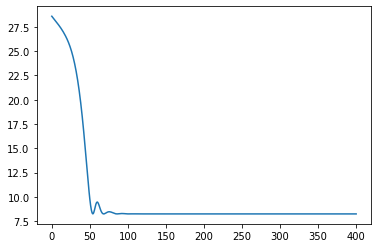

Final loss :  tensor(8.2502, grad_fn=<MseLossBackward>)


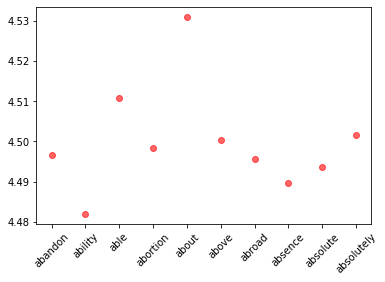

In [ ]:
opt=optim.Adam(net.parameters(),lr=0.0001)
criterion=nn.MSELoss()
epochs=500
ls=[] 
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
  #Loading resource to cuda memory
  net.train()
  net_num.train()
  opt.zero_grad()
  pred_seq,_=net(tensor_x)
  pred=net_num(pred_seq)
  loss=criterion(pred,tensor_y)
  loss.backward()
  opt.step()
  ls.append(loss)
  if i%100==0:
    clear_output(True)
    plt.plot(ls)
    plt.show()
print("Final loss : ",loss)
#plt.plot(ls)
#plt.show()
net.eval()
pred,gru_op=net(tensor_x)
plt.xticks(rotation=45)
plt.scatter(x,pred.detach(),color="r",alpha=0.6)
#plt.scatter(x,gru_op,color="g")
plt.show()

In [ ]:
print(pred)

tensor([[4.5004],
        [4.5000],
        [4.5038],
        [4.5002],
        [4.5041],
        [4.5010],
        [4.5038],
        [4.4992],
        [4.4873],
        [4.5002]], grad_fn=<AddmmBackward>)


torch.Size([10, 1])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

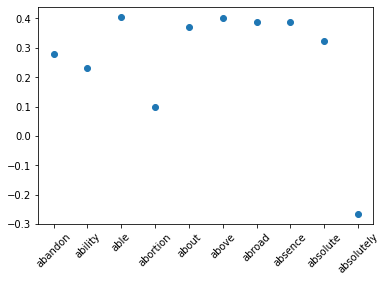

In [ ]:
#Plotting and visuvalizing
net.eval()
vector=net(tensor_x)
print(vector.shape)
plt.scatter(x,vector.detach())
plt.xticks(rotation=45)